In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [4]:
T = 58.4 #Температура Новека при сборе статистических данных
Cp = 2 * T + 1133 #Дж/кг*К - вода
r = 125000 #Дж/кг
ρ_w = -2.692 * T + 1582 #кг/м3- novec
ρ_v = 0.0034 * (T ** 2) - 0.103 * T + 2.333 #кг/м3 - пар
η = 0.0003 # Н*c/м2 - динамическая 
λ = 0.06
g = 9.81
ν = η / ρ_w #м2/с - кинематическая
σ = 0.0136 #Н/м - поверхностное натяжение
Pr = (η * Cp) / λ
Ar = (g / (ν ** 2)) * ((σ / (g * ρ_w)) ** (3 / 2))

In [5]:
tests = pd.read_csv('experimental data.csv', sep=';')
tests

,Замер,"Напряжение, В","Сила тока, А","Температура, °С","Мощность, Вт","Плотность ТП, Вт/м2"
0,regstat1,"2,13","4,7",NaN,"10,011","10627,38854"
1,regstat2,"1,9","4,2",NaN,"7,98","8471,33758"
2,regstat3,"1,68","3,7",NaN,"6,216","6598,726115"
3,regstat4,"1,5","3,2",NaN,"4,8","5095,541401"
4,regstat5,"1,33","2,9",NaN,"3,857","4094,47983"
5,regstat6,"1,11","2,4",NaN,"2,664","2828,025478"
6,regstat7,"1,025","2,15",NaN,"2,20375","2339,437367"
7,regstat8,"0,9","2,05",NaN,"1,845","1958,598726"
8,regstat9,"2,52","5,85",NaN,"14,742","15649,68153"
9,regstat10,"3,02","6,7",NaN,"20,234","21479,83015"


In [6]:
tests = tests.set_index('Замер')
tests = tests.replace(',', '.', regex=True)
tests = tests.astype(float)
tests = tests.drop(columns={'Температура, °С'})
tests.columns = ['U, V', 'I, A', 'P, W', 'q, W/m2']
tests['ΔT'] = (tests['q, W/m2'] ** 0.3) / 3
tests

,"U, V","I, A","P, W","q, W/m2",ΔT
Замер,,,,,
regstat1,2.130,4.70,10.01100,10627.388540,5.380303
regstat2,1.900,4.20,7.98000,8471.337580,5.026484
regstat3,1.680,3.70,6.21600,6598.726115,4.663551
regstat4,1.500,3.20,4.80000,5095.541401,4.315547
regstat5,1.330,2.90,3.85700,4094.479830,4.041461
regstat6,1.110,2.40,2.66400,2828.025478,3.616794
regstat7,1.025,2.15,2.20375,2339.437367,3.416742
regstat8,0.900,2.05,1.84500,1958.598726,3.239384
regstat9,2.520,5.85,14.74200,15649.681530,6.042691


In [7]:
tests['D0, m'] = [470.6, 433.5, 399.6, 387, 360.5, 319.1, 387.2, 373.4, 607.7, 829.5, 1048.6, 1207.4, 1104]
tests

,"U, V","I, A","P, W","q, W/m2",ΔT,"D0, m"
Замер,,,,,,
regstat1,2.130,4.70,10.01100,10627.388540,5.380303,470.6
regstat2,1.900,4.20,7.98000,8471.337580,5.026484,433.5
regstat3,1.680,3.70,6.21600,6598.726115,4.663551,399.6
regstat4,1.500,3.20,4.80000,5095.541401,4.315547,387.0
regstat5,1.330,2.90,3.85700,4094.479830,4.041461,360.5
regstat6,1.110,2.40,2.66400,2828.025478,3.616794,319.1
regstat7,1.025,2.15,2.20375,2339.437367,3.416742,387.2
regstat8,0.900,2.05,1.84500,1958.598726,3.239384,373.4
regstat9,2.520,5.85,14.74200,15649.681530,6.042691,607.7


In [8]:
tests = tests.rename(columns={'D0, m' : 'D0, mkm'})

In [9]:
tests = tests.drop(index=['regstat9', 'regstat10', 'regstat11', 'regstat12', 'regstat13'])

In [18]:
tests
tests.to_excel('output.xlsx')

In [19]:
tests = tests.sort_values(by='ΔT')
tests

,"U, V","I, A","P, W","q, W/m2",ΔT,"D0, mkm"
Замер,,,,,,
regstat8,0.900,2.05,1.84500,1958.598726,3.239384,373.4
regstat7,1.025,2.15,2.20375,2339.437367,3.416742,387.2
regstat6,1.110,2.40,2.66400,2828.025478,3.616794,319.1
regstat5,1.330,2.90,3.85700,4094.479830,4.041461,360.5
regstat4,1.500,3.20,4.80000,5095.541401,4.315547,387.0
regstat3,1.680,3.70,6.21600,6598.726115,4.663551,399.6
regstat2,1.900,4.20,7.98000,8471.337580,5.026484,433.5
regstat1,2.130,4.70,10.01100,10627.388540,5.380303,470.6


In [26]:
def func(x, a):
    return a * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
popt, pcov = curve_fit(func, tests['ΔT'], tests['D0, mkm'])
a_opt = popt
D0_fit = func(tests['ΔT'], a_opt)
correlation_coefficient, p_value = pearsonr(tests['D0, mkm'], D0_fit)
r_squared = correlation_coefficient ** 2
print(a_opt, correlation_coefficient, p_value, r_squared)

[0.30421929] 0.8197897062681957 0.012724920411353985 0.6720551625032946


In [27]:
r2 = r2_score(tests['D0, mkm'], D0_fit)
r2

0.6416520911686858

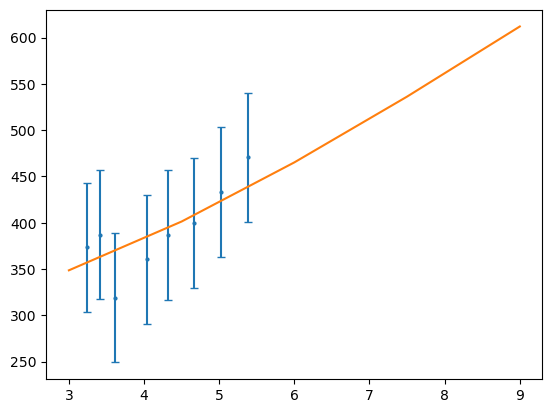

In [13]:
x = np.linspace(3, 9, 5)
graph, axes = plt.subplots()
axes.errorbar(tests['ΔT'], tests['D0, mkm'], yerr=70, fmt='o', capsize=3, markersize=2)
axes.plot(x, 0.304 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))